# Dynamic Top2Vec

In [3]:
%%capture
!pip install top2vec
!pip install top2vec[sentence_transformers]
!pip install top2vec[indexing]

In [ ]:
# model = Top2Vec(documents)
# model.save("Top2vec_Model")

In [48]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from top2vec import Top2Vec
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

df = pd.read_json('updated_articles.json')
documents = list(df['content'])
model = Top2Vec.load("Top2vec_Model")

print(f'the number of topics is {model.get_num_topics()}')

topic_words, word_scores, topic_nums = model.get_topics(77)
topics = topic_words[:15,:4]

the number of topics is 97


In [49]:
topic_vectors = model.topic_vectors

# Get document vectors
document_vectors = model.document_vectors

# Compute cosine similarity between each document and each topic
similarity_scores = cosine_similarity(document_vectors, topic_vectors)


# Add a new column for each topic
for i in range(15):
    df[f'{topics[i]}'] = similarity_scores[:, i]

In [50]:
df['date'] = pd.to_datetime(df['date'], format='%d %B %Y', errors='coerce')
df.index = df['date']
df['year-month'] = df.index.to_period('M')
df['Date (by month)'] = df['year-month'].dt.to_timestamp()
df = df.set_index('Date (by month)') 
columns = [f'{i}' for i in topics]
columns.append('year-month')
df = df[columns]

# Topics

In [45]:
for i , e in enumerate(Topics_list):
    print(f'topic{i}: {e}\n')

topic0: ['defences' 'properties' 'flood' 'flooding' 'embankment' 'walls'
 'residents' 'wall' 'alleviation' 'town']

topic1: ['fintech' 'trade' 'inward' 'tech' 'firms' 'markets' 'talent' 'trading'
 'dit' 'entrepreneurs']

topic2: ['asia' 'ghana' 'africa' 'bilateral' 'foreign' 'trade' 'prosperity'
 'nigeria' 'ties' 'deepen']

topic3: ['sentence' 'defendant' 'waste' 'court' 'dumped' 'failed' 'told' 'pleaded'
 'sentencing' 'magistrates']

topic4: ['appointments' 'board' 'trustee' 'appointees' 'she' 'merit' 'reappointed'
 'chairman' 'appointment' 'appointed']

topic5: ['madam' 'violations' 'geneva' 'rights' 'rapporteur' 'locationsuk' 'un'
 'wto' 'defenders' 'libya']

topic6: ['crime' 'waste' 'criminals' 'legitimate' 'carriers' 'crimestoppers'
 'anonymously' 'dumped' 'dumping' 'carrier']

topic7: ['warnings' 'envagency' 'rain' 'floodaware' 'heavy' 'weekend' 'flooding'
 'alerts' 'clock' 'severe']

topic8: ['slc' 'apprenticeship' 'employer' 'graduate' 'apprentices' 'employers'
 'careers' 'care

# Dynamic Topics

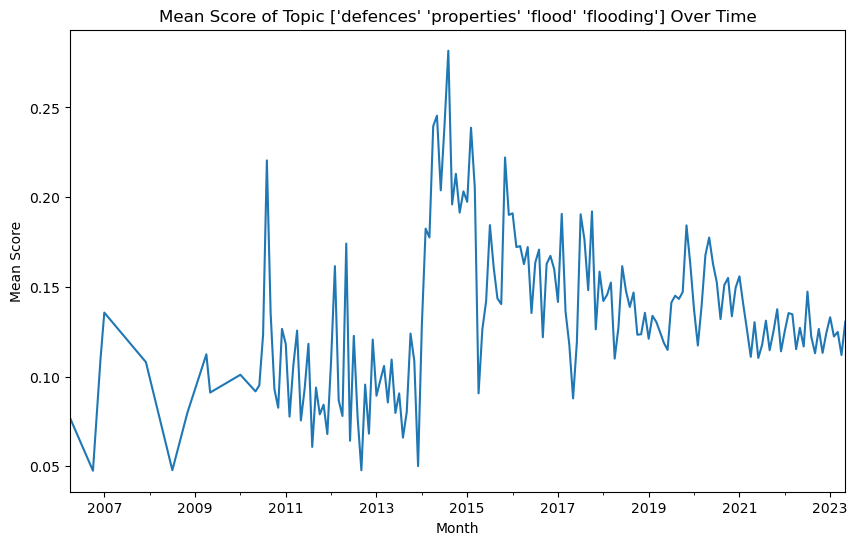

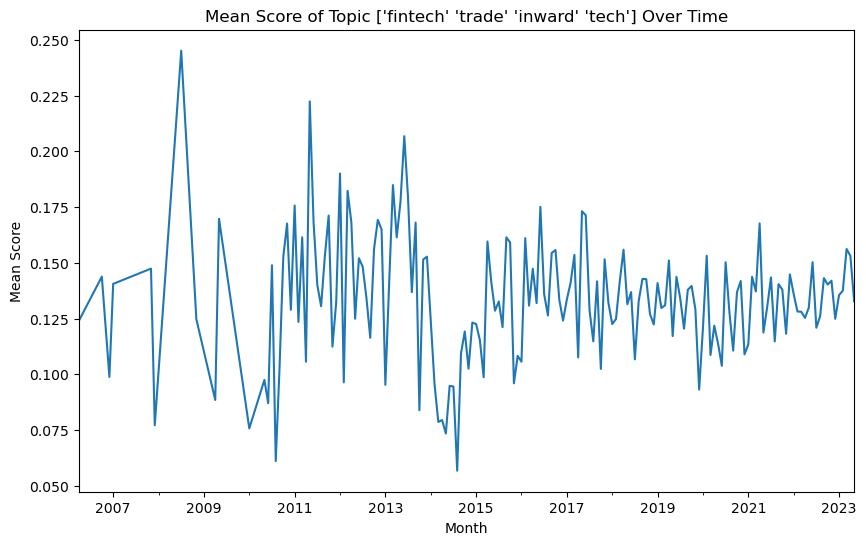

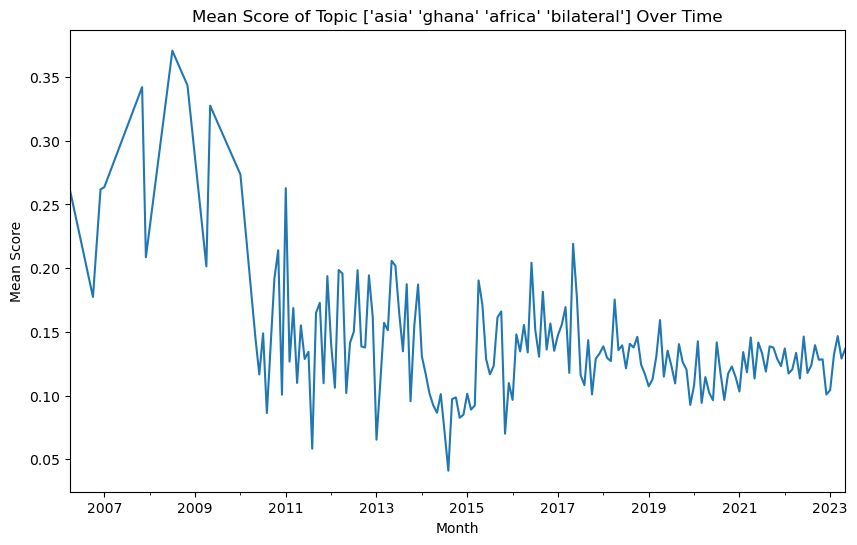

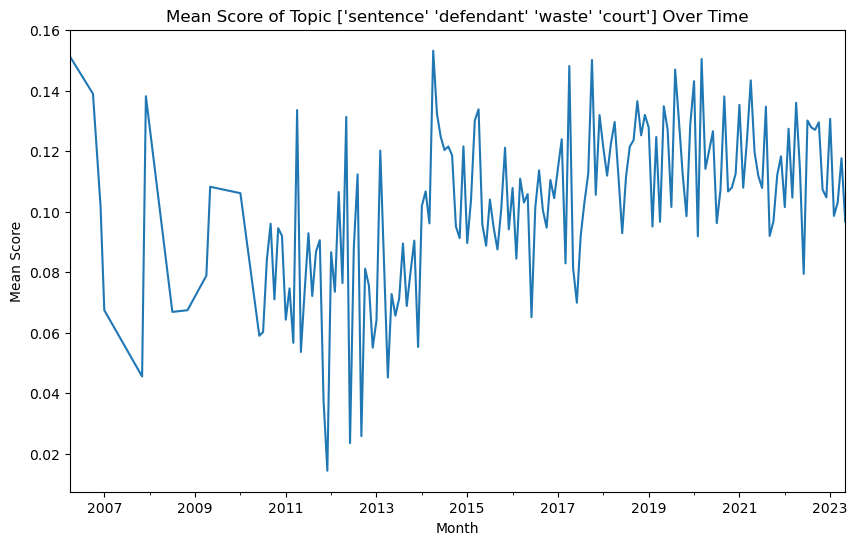

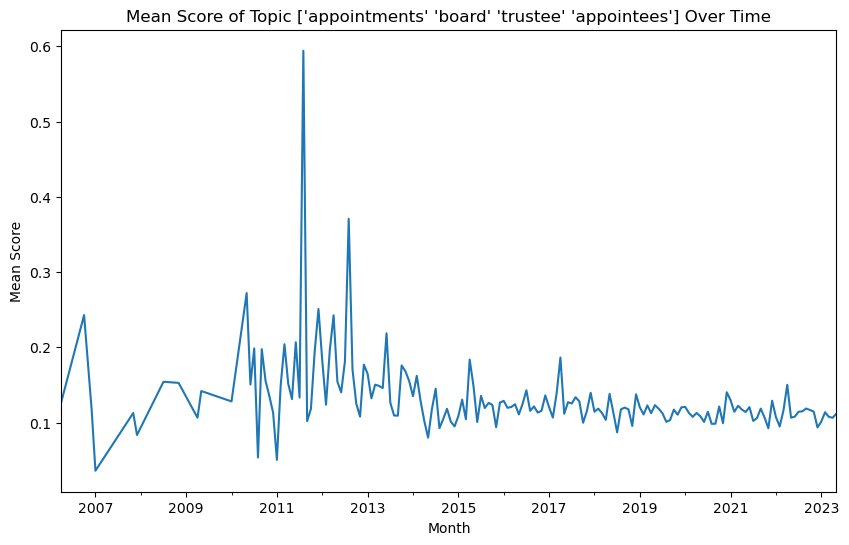

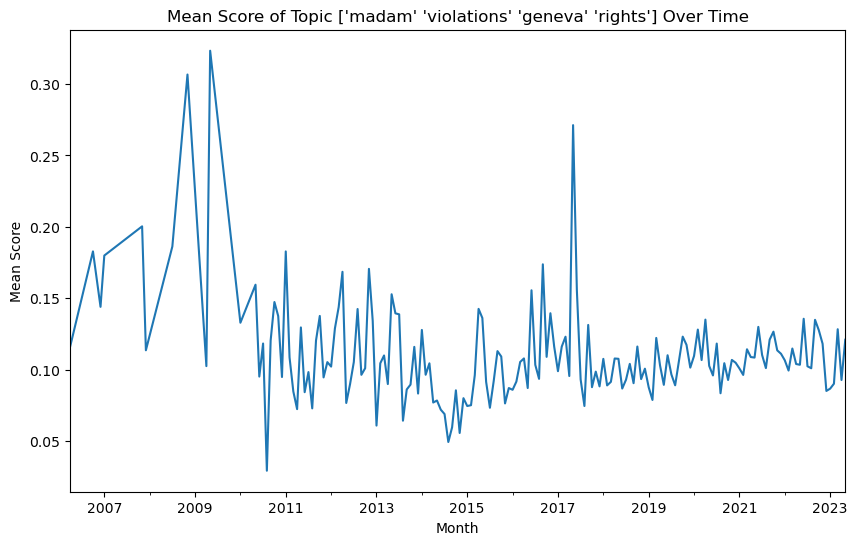

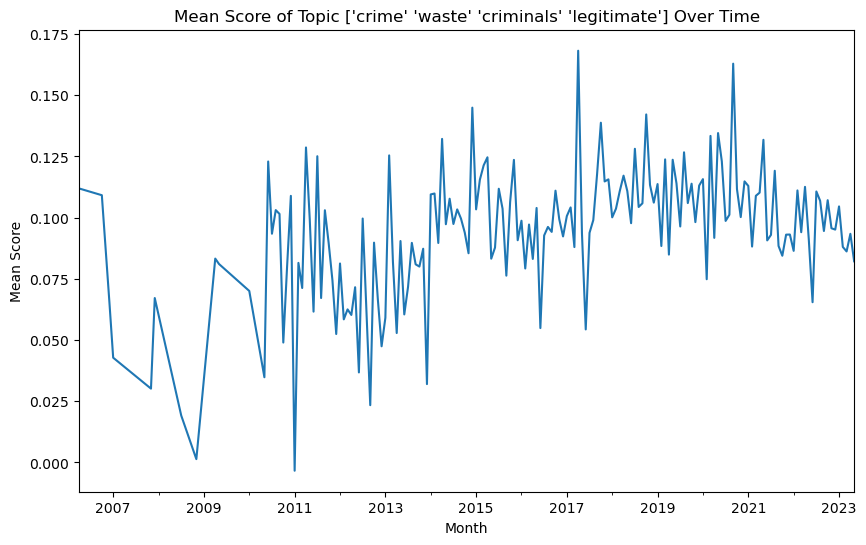

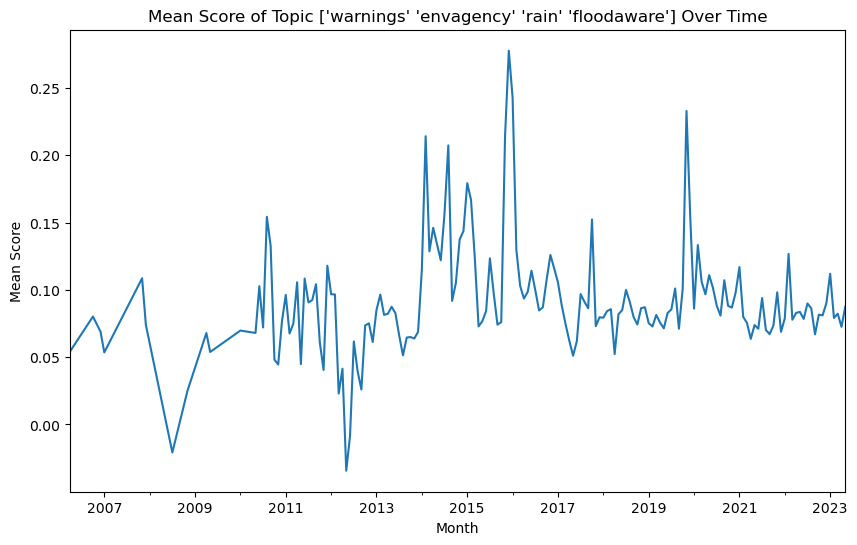

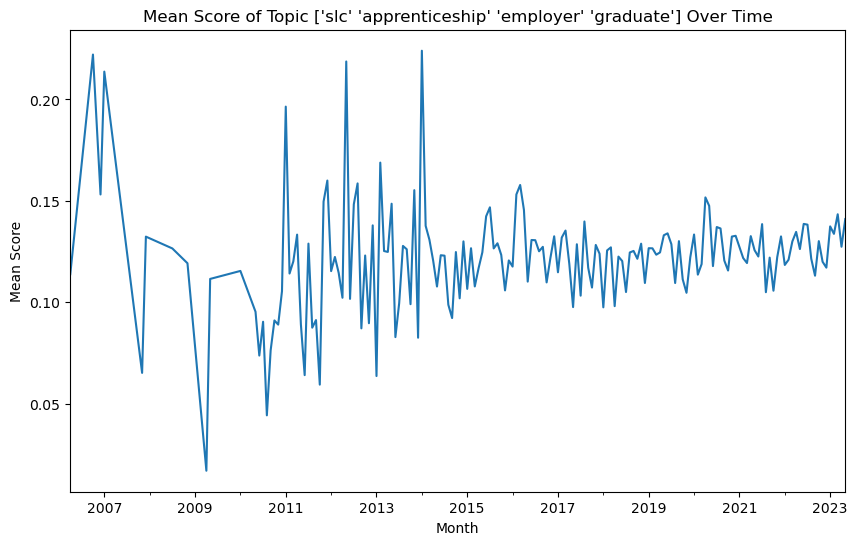

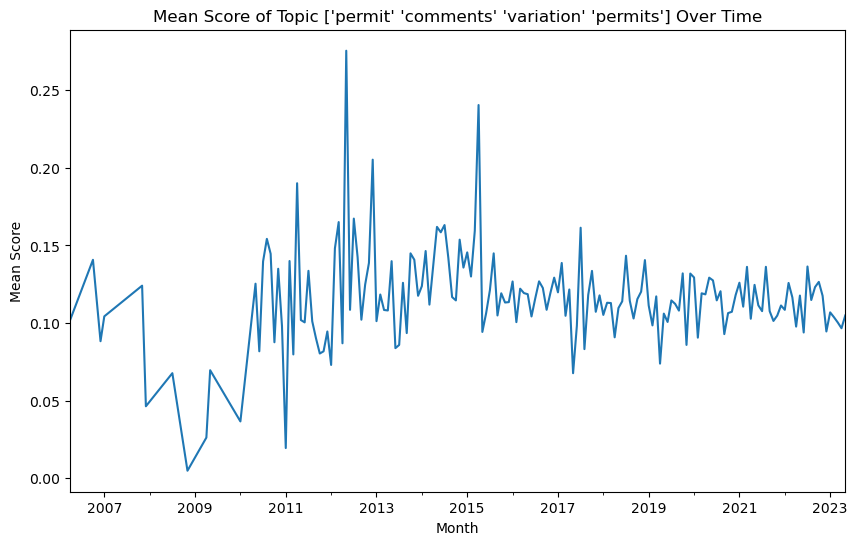

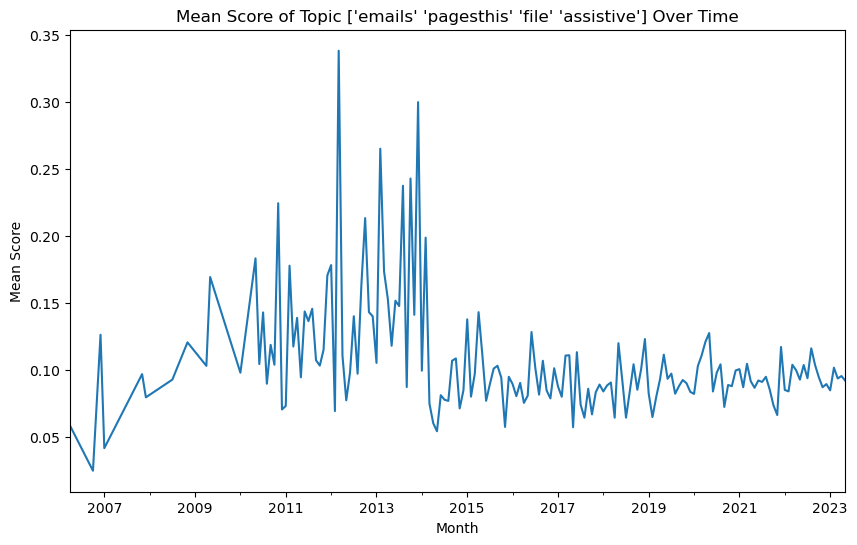

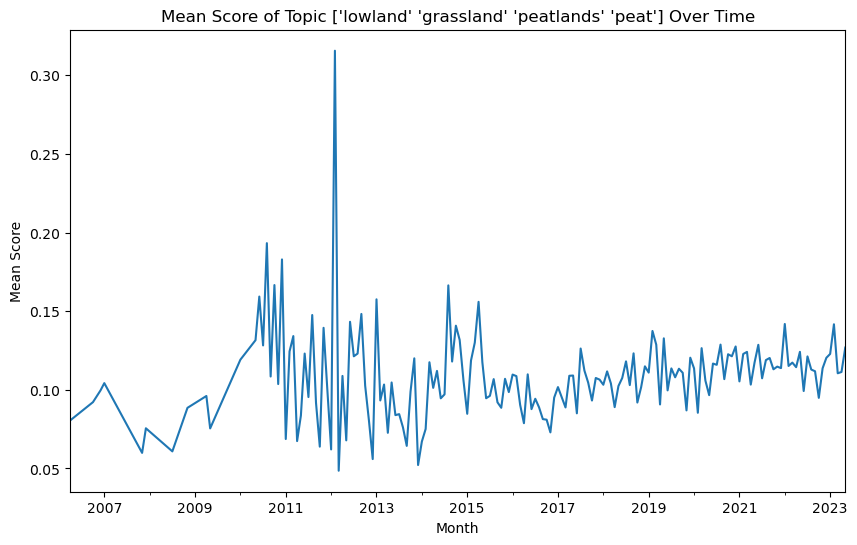

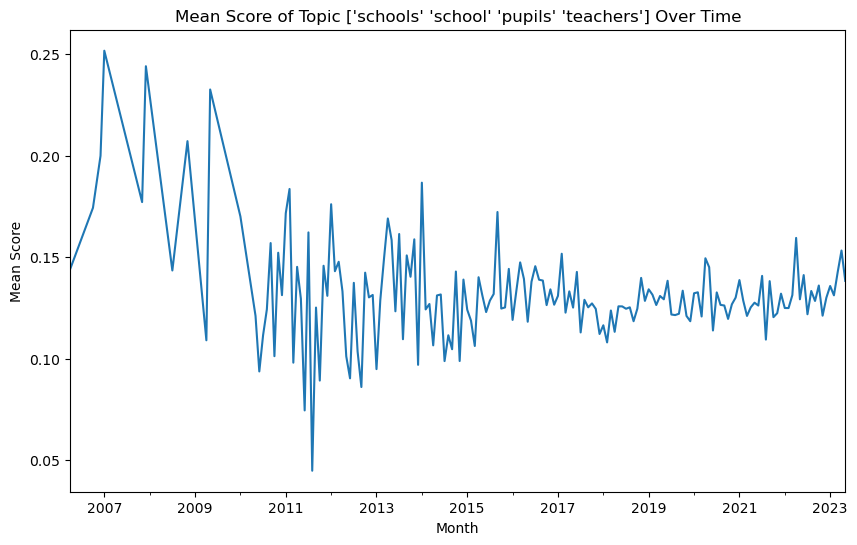

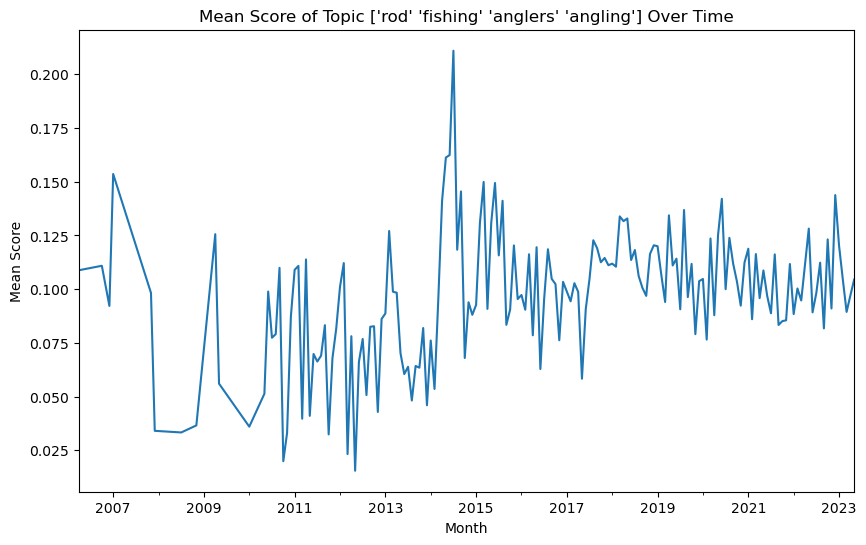

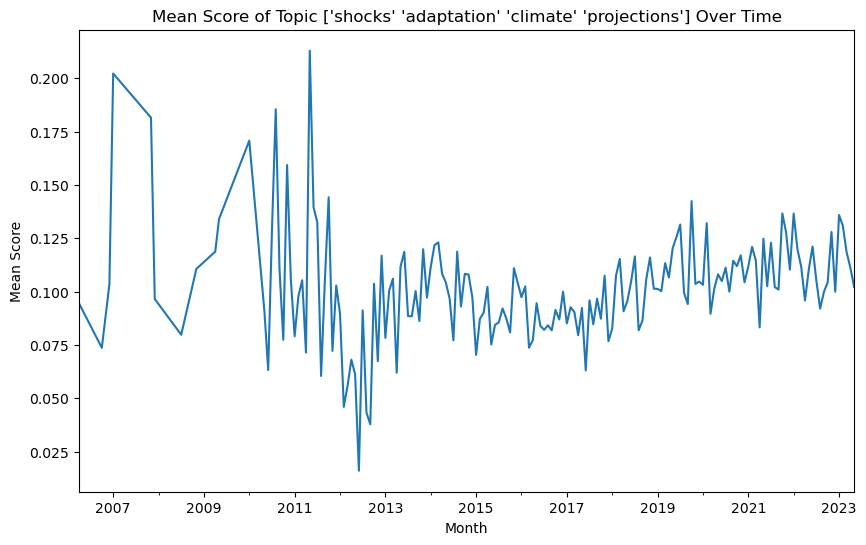

In [27]:
import matplotlib.pyplot as plt

monthly_means = df.groupby("year-month").mean()

# Plot topics
for i in topics:  # Change this to the number of topics you have
    plt.figure(figsize=(10, 6))
    monthly_means[f'{i}'].plot(kind='line')
    plt.title(f'Mean Score of Topic {i} Over Time')
    plt.xlabel('Month')
    plt.ylabel('Mean Score')
    plt.show()

# Coherance

In [32]:
import pandas as pd
import re

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_20newsgroups

from gensim.models.coherencemodel import CoherenceModel
from gensim.corpora.dictionary import Dictionary

Topics_list = topic_words[:15,:10]

df_cohere = pd.read_json('updated_articles.json')

tokenizer = lambda s: re.findall( '\w+', s.lower() )
texts = [ tokenizer(t) for t in  df_cohere['content'] ]

word2id = Dictionary( texts )

# Coherence model
cm = CoherenceModel(topics=Topics_list, 
                    texts=texts,
                    coherence='c_v',  
                    dictionary=word2id)

coherence_per_topic = cm.get_coherence_per_topic()

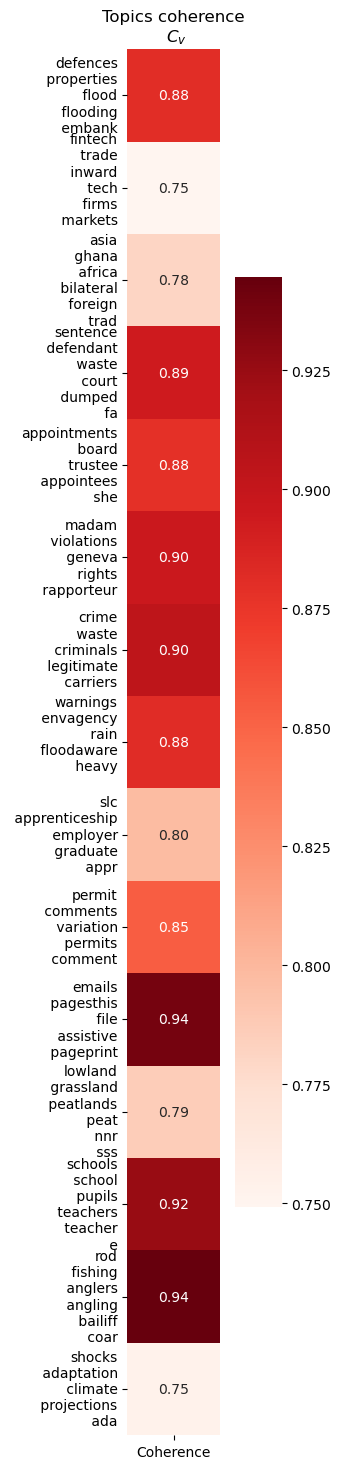

In [38]:
topics_str = [ '\n '.join(t)[:45] for t in Topics_list ]
data_topic_score = pd.DataFrame( data=zip(topics_str, coherence_per_topic), columns=['Topic', 'Coherence'] )
data_topic_score = data_topic_score.set_index('Topic')

fig, ax = plt.subplots( figsize=(4,18) )
ax.set_title("Topics coherence\n $C_v$")
sns.heatmap(data=data_topic_score, annot=True, square=True,
            cmap='Reds', fmt='.2f',
            linecolor='black', ax=ax )
plt.yticks( rotation=0 )
ax.set_xlabel('')
ax.set_ylabel('')
fig.show()